# Import Libraries

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

import warnings
warnings.filterwarnings('ignore')

# Load the dataset 

In [79]:
data = pd.read_csv("used_cs_1.csv")


# Take a look at the data

In [33]:
data.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022


# Check the details

In [6]:
data.describe()

,kilometers,year
count,9.970000e+03,9000.000000
mean,9.894896e+04,2015.626444
std,1.154300e+06,4.735991
min,0.000000e+00,1953.000000
25%,2.314350e+04,2014.000000
50%,7.600000e+04,2016.000000
75%,1.330828e+05,2019.000000
max,1.150000e+08,2021.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9970 entries, 0 to 9969
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 9965 non-null   object 
 1   price_in_aed          9970 non-null   object 
 2   kilometers            9970 non-null   int64  
 3   body_condition        9970 non-null   object 
 4   mechanical_condition  9970 non-null   object 
 5   seller_type           9970 non-null   object 
 6   body_type             9970 non-null   object 
 7   no_of_cylinders       9889 non-null   object 
 8   transmission_type     9970 non-null   object 
 9   regional_specs        9970 non-null   object 
 10  horsepower            9970 non-null   object 
 11  fuel_type             9970 non-null   object 
 12  steering_side         9970 non-null   object 
 13  year                  9000 non-null   float64
 14  color                 9970 non-null   object 
 15  emirate              

# Look at the total number of missing values in each column

In [8]:
data.isnull().sum()

title                     5
price_in_aed              0
kilometers                0
body_condition            0
mechanical_condition      0
seller_type               0
body_type                 0
no_of_cylinders          81
transmission_type         0
regional_specs            0
horsepower                0
fuel_type                 0
steering_side             0
year                    970
color                     0
emirate                   0
motors_trim              28
company                   0
model                     0
date_posted               0
dtype: int64

In [9]:
data.columns

Index(['title', 'price_in_aed', 'kilometers', 'body_condition',
       'mechanical_condition', 'seller_type', 'body_type', 'no_of_cylinders',
       'transmission_type', 'regional_specs', 'horsepower', 'fuel_type',
       'steering_side', 'year', 'color', 'emirate', 'motors_trim', 'company',
       'model', 'date_posted'],
      dtype='object')

In [80]:
data.dropna(inplace = True)

In [15]:
#data.isnull().sum()
data.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,seller_type,body_type,no_of_cylinders,transmission_type,regional_specs,horsepower,fuel_type,steering_side,year,color,emirate,motors_trim,company,model,date_posted
0,MITSUBISHI PAJERO 3.5L / 2013,"26,000",167390,Perfect inside and out,Perfect inside and out,Dealer,SUV,6,Automatic Transmission,GCC Specs,Unknown,Gasoline,Left Hand Side,2013.0,Silver,Dubai,GLS,mitsubishi,pajero,13/05/2022
1,chevrolet silverado,"110,000",39000,Perfect inside and out,Perfect inside and out,Dealer,SUV,8,Automatic Transmission,North American Specs,400 - 500 HP,Gasoline,Left Hand Side,2018.0,White,Sharjah,1500 High Country,chevrolet,silverado,14/01/2022


# Feature Selection 

In [81]:
to_drop = ['seller_type', 'regional_specs',  'fuel_type', 'color', 'emirate', 'motors_trim','model', 'date_posted']
data_selection = data.drop(columns = to_drop)

In [23]:
data_selection.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8944 entries, 0 to 9969
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 8944 non-null   object 
 1   price_in_aed          8944 non-null   object 
 2   kilometers            8944 non-null   int64  
 3   body_condition        8944 non-null   object 
 4   mechanical_condition  8944 non-null   object 
 5   body_type             8944 non-null   object 
 6   no_of_cylinders       8944 non-null   object 
 7   transmission_type     8944 non-null   object 
 8   horsepower            8944 non-null   object 
 9   steering_side         8944 non-null   object 
 10  year                  8944 non-null   float64
 11  company               8944 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 908.4+ KB


# Getting columns into appropriate data type

In [82]:
data_selection['price_in_aed'] = data_selection['price_in_aed'].astype("category")
data_selection['price_in_aed'] = data_selection['price_in_aed'].str.replace(",", "")
data_selection['price_in_aed'] = data_selection['price_in_aed'].astype(float)

In [83]:
#data_selection.describe()
data_selection['Price_USD'] = data_selection['price_in_aed'] * 0.27

In [39]:
#data_selection.head()

# Outlier Treatment

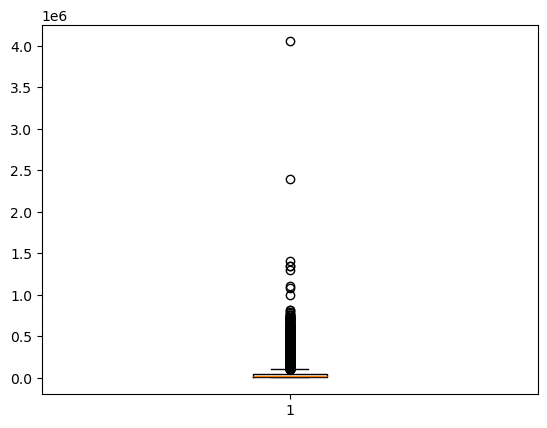

In [19]:
plt.boxplot(data_selection['Price_USD'])
plt.show()

In [20]:
data_1 = data_selection.copy()

In [21]:
upper_limit = data_1['Price_USD'].quantile(0.99)
lower_limit = data_1['Price_USD'].quantile(.01)
mask_price = (data_1['Price_USD'] <= upper_limit) & (data_1['Price_USD'] >= lower_limit)
mask_price

0       True
1       True
2       True
3       True
4       True
        ... 
9964    True
9965    True
9966    True
9968    True
9969    True
Name: Price_USD, Length: 8944, dtype: bool

In [22]:
data_1 = data_1[mask_price]

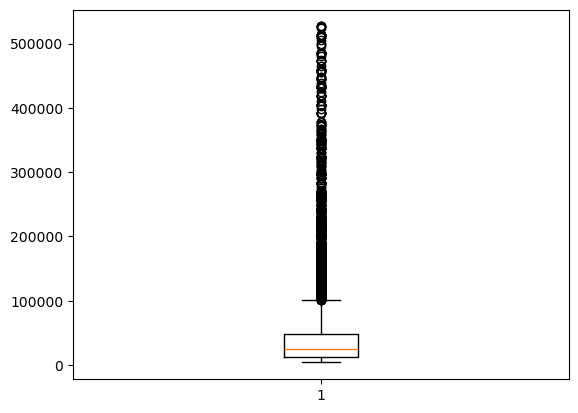

In [23]:
plt.boxplot(data_1['Price_USD'])
plt.show()

In [48]:
#mask_inv = np.invert(mask_price)
#data_1_costly_cars = data_selection[mask_inv]

In [50]:
#plt.boxplot(data_1_costly_cars['Price_USD'])
#plt.show()

In [84]:
data_2 = data_selection.copy()
mask_price_2 = data_2['Price_USD'] <= 50000
data_2 = data_2[mask_price_2]


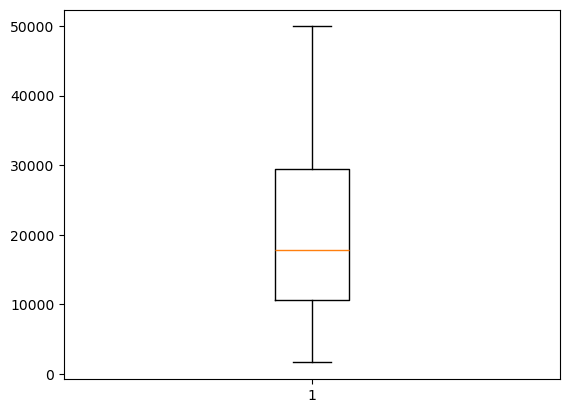

In [85]:
plt.boxplot(data_2['Price_USD'])
plt.savefig("incompleteboxplot_1.png")
plt.show()

In [26]:
plt.savefig("incompleteboxplot_1.png")

<Figure size 640x480 with 0 Axes>

# Feature Scaling

In [28]:
data_2.head(2)

,title,price_in_aed,kilometers,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,steering_side,year,company,Price_USD
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,167390,Perfect inside and out,Perfect inside and out,SUV,6,Automatic Transmission,Unknown,Left Hand Side,2013.0,mitsubishi,7020.0
1,chevrolet silverado,110000.0,39000,Perfect inside and out,Perfect inside and out,SUV,8,Automatic Transmission,400 - 500 HP,Left Hand Side,2018.0,chevrolet,29700.0


In [86]:
scaler = MinMaxScaler()

In [87]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6750 entries, 0 to 9969
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 6750 non-null   object 
 1   price_in_aed          6750 non-null   float64
 2   kilometers            6750 non-null   int64  
 3   body_condition        6750 non-null   object 
 4   mechanical_condition  6750 non-null   object 
 5   body_type             6750 non-null   object 
 6   no_of_cylinders       6750 non-null   object 
 7   transmission_type     6750 non-null   object 
 8   horsepower            6750 non-null   object 
 9   steering_side         6750 non-null   object 
 10  year                  6750 non-null   float64
 11  company               6750 non-null   object 
 12  Price_USD             6750 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 738.3+ KB


In [88]:
data_2.reset_index(inplace=True)

In [89]:
scaler_1 = MinMaxScaler()
data_scaled_1 = scaler_1.fit_transform(data_2[['kilometers','Price_USD']])

In [90]:
type(data_scaled_1)

numpy.ndarray

In [91]:
data_scaled_cols = pd.DataFrame(data_scaled_1, columns = ['kilometers','Price_USD'])
data_scaled_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kilometers  6750 non-null   float64
 1   Price_USD   6750 non-null   float64
dtypes: float64(2)
memory usage: 105.6 KB


In [92]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 6750 non-null   int64  
 1   title                 6750 non-null   object 
 2   price_in_aed          6750 non-null   float64
 3   kilometers            6750 non-null   int64  
 4   body_condition        6750 non-null   object 
 5   mechanical_condition  6750 non-null   object 
 6   body_type             6750 non-null   object 
 7   no_of_cylinders       6750 non-null   object 
 8   transmission_type     6750 non-null   object 
 9   horsepower            6750 non-null   object 
 10  steering_side         6750 non-null   object 
 11  year                  6750 non-null   float64
 12  company               6750 non-null   object 
 13  Price_USD             6750 non-null   float64
dtypes: float64(3), int64(2), object(9)
memory usage: 738.4+ KB


In [93]:
data_2.drop(columns = ['kilometers','Price_USD'], inplace = True)

In [94]:
data_scaled_columns = pd.concat([data_2, data_scaled_cols], axis = 1, ignore_index= True)

In [95]:
data_scaled_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750 entries, 0 to 6749
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6750 non-null   int64  
 1   1       6750 non-null   object 
 2   2       6750 non-null   float64
 3   3       6750 non-null   object 
 4   4       6750 non-null   object 
 5   5       6750 non-null   object 
 6   6       6750 non-null   object 
 7   7       6750 non-null   object 
 8   8       6750 non-null   object 
 9   9       6750 non-null   object 
 10  10      6750 non-null   float64
 11  11      6750 non-null   object 
 12  12      6750 non-null   float64
 13  13      6750 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 738.4+ KB


In [96]:
data_scaled_columns

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,Perfect inside and out,Perfect inside and out,SUV,6,Automatic Transmission,Unknown,Left Hand Side,2013.0,mitsubishi,0.001456,0.111732
1,1,chevrolet silverado,110000.0,Perfect inside and out,Perfect inside and out,SUV,8,Automatic Transmission,400 - 500 HP,Left Hand Side,2018.0,chevrolet,0.000339,0.581006
2,2,MERCEDES-BENZ E300 - 2014 - GCC SPEC - FULL OP...,78000.0,Perfect inside and out,Perfect inside and out,Sedan,6,Automatic Transmission,400 - 500 HP,Left Hand Side,2014.0,mercedes-benz,0.001739,0.402235
3,4,USED RENAULT DOKKER 2020,33000.0,Perfect inside and out,Perfect inside and out,Wagon,4,Manual Transmission,Less than 150 HP,Left Hand Side,2020.0,renault,0.000600,0.150838
4,5,A7 S-line Quattro. Under Warranty. Accidents F...,98000.0,Perfect inside and out,Perfect inside and out,Sedan,6,Automatic Transmission,200 - 300 HP,Left Hand Side,2015.0,audi,0.000730,0.513966
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6745,9959,Family Used LandRover LR3// Original Paint// F...,19500.0,Perfect inside and out,Perfect inside and out,SUV,6,Automatic Transmission,150 - 200 HP,Left Hand Side,2008.0,land-rover,0.001174,0.075419
6746,9960,2019 lexus nx300t full options in excellent co...,95000.0,Perfect inside and out,Perfect inside and out,SUV,4,Automatic Transmission,200 - 300 HP,Left Hand Side,2019.0,lexus,0.000296,0.497207
6747,9966,LOW MILEAGE Cadillac Escalade Platinum,90000.0,Perfect inside and out,Perfect inside and out,SUV,8,Automatic Transmission,400 - 500 HP,Left Hand Side,2014.0,cadillac,0.000484,0.469274
6748,9968,Chevrolet Malibu GCC Spec,18900.0,"No accidents, very few faults",Perfect inside and out,Sedan,4,Automatic Transmission,150 - 200 HP,Left Hand Side,2013.0,chevrolet,0.001217,0.072067


In [66]:
data_scaled_columns.dropna(inplace = True)

In [38]:
scaler_2 = Normalizer()
#data_scaled_2 = 
scaler_2.fit_transform(data_2[['kilometers','Price_USD']])


array([[0.99912176, 0.04190116],
       [0.79557218, 0.60585882],
       [0.99450164, 0.10472102],
       ...,
       [0.91641419, 0.40023122],
       [0.99933636, 0.03642581],
       [0.97151152, 0.23699233]])

In [40]:
scaler_3 = StandardScaler()
#data_scaled_3 = 
scaler_3.fit_transform(data_2[['kilometers','Price_USD']])

array([[ 0.02504229, -1.135898  ],
       [-0.0665999 ,  0.73977882],
       [ 0.04831864,  0.02523527],
       ...,
       [-0.0547226 ,  0.29318911],
       [ 0.00549186, -1.29443735],
       [-0.03305225,  0.01853643]])

# Feature Extraction: Nominal Attributes

In [69]:
data_2['body_condition'].value_counts()

body_condition
Perfect inside and out                6430
No accidents, very few faults          190
A bit of wear & tear, all repaired      99
Normal wear & tear, a few issues        31
Name: count, dtype: int64

In [72]:
body_con_dict = {'Perfect inside and out': '1.0', 'No accidents, very few faults': '0.6', 
                 'A bit of wear & tear, all repaired':'0.3','Normal wear & tear, a few issues':'0.1' }

In [75]:
data_2['body_condition'] = data_2['body_condition'].map(body_con_dict).astype(float)

In [76]:
data_2.head(2)

,title,price_in_aed,body_condition,mechanical_condition,body_type,no_of_cylinders,transmission_type,horsepower,steering_side,year,company
0,MITSUBISHI PAJERO 3.5L / 2013,26000.0,1.0,Perfect inside and out,SUV,6,Automatic Transmission,Unknown,Left Hand Side,2013.0,mitsubishi
1,chevrolet silverado,110000.0,1.0,Perfect inside and out,SUV,8,Automatic Transmission,400 - 500 HP,Left Hand Side,2018.0,chevrolet


In [77]:
data['mechanical_condition'].value_counts()

mechanical_condition
Perfect inside and out              8797
Minor faults, all fixed              135
Major faults fixed, small remain       8
Ongoing minor & major faults           3
Major faults, all fixed                1
Name: count, dtype: int64